# COVID 19 Analysis



In [284]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [285]:
#reading the files
demographic_data = pd.read_csv("C:\\Users\\Leehee\\repos\\Covid-19\\files\\covid19_line_list_data.csv")
prevalence_data = pd.read_csv("C:\\Users\\Leehee\\repos\\Covid-19\\files\\covid_19_data.csv")


In [286]:
demographic_data.head()
prevalence_data.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [287]:
#calculate the percentage of null values in each column
percent_missing_dd = demographic_data.isna().mean().round(2) * 100
percent_missing_pd = prevalence_data.isna().mean().round(2) * 100
print(percent_missing_dd, percent_missing_pd) 



id                         0.0
case_in_country           18.0
reporting date             0.0
Unnamed: 3               100.0
summary                    0.0
location                   0.0
country                    0.0
gender                    17.0
age                       22.0
symptom_onset             48.0
If_onset_approximated     48.0
hosp_visit_date           53.0
exposure_start            88.0
exposure_end              69.0
visiting Wuhan             0.0
from Wuhan                 0.0
death                      0.0
recovered                  0.0
symptom                   75.0
source                     0.0
link                       0.0
Unnamed: 21              100.0
Unnamed: 22              100.0
Unnamed: 23              100.0
Unnamed: 24              100.0
Unnamed: 25              100.0
Unnamed: 26              100.0
dtype: float64 SNo                 0.0
ObservationDate     0.0
Province/State     45.0
Country/Region      0.0
Last Update         0.0
Confirmed           0.0
Deat

In [288]:
#drop columns with 100% missing data
dd = demographic_data.drop(['Unnamed: 3', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23' , 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26'], axis=1)
pd = prevalence_data.copy()

In [289]:
#replace nan values in the 'symptom_onset' to 'Unknown'
dd['symptom_onset'] = dd['symptom_onset'].fillna('Unknown')
pd['Province/State'] = pd['Province/State'].fillna('Unknown')

In [290]:
pd.info()
#change columns that represent number of people to int instead of float
pd[["Confirmed", "Deaths", "Recovered"]] = pd[["Confirmed", "Deaths", "Recovered"]].astype(int)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9117 entries, 0 to 9116
Data columns (total 8 columns):
SNo                9117 non-null int64
ObservationDate    9117 non-null object
Province/State     9117 non-null object
Country/Region     9117 non-null object
Last Update        9117 non-null object
Confirmed          9117 non-null float64
Deaths             9117 non-null float64
Recovered          9117 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 569.9+ KB


In [291]:
#create a new column for each observation- active cases
pd['Active'] = pd['Confirmed'] - pd['Recovered'] - pd['Deaths']
pd.head(10)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Active
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0,1
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0,14
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0,6
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0,1
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0,0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26,0,0,26
6,7,01/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2,0,0,2
7,8,01/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1,0,0,1
8,9,01/22/2020,Hainan,Mainland China,1/22/2020 17:00,4,0,0,4
9,10,01/22/2020,Hebei,Mainland China,1/22/2020 17:00,1,0,0,1


In [292]:
#Create a new dataframe, based on the updated observations. The data was last updated on March 26th.
pd_updated = pd[pd['ObservationDate'] == max(pd['ObservationDate'])].reset_index()

#get most updated data globally
updated_world_status = pd_updated.groupby('ObservationDate')[["Confirmed", "Deaths", "Recovered", "Active"]].sum()


C:\Users\Leehee\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


Text(0.5, 1.0, 'World COVID-19 Status - 26/3/20')

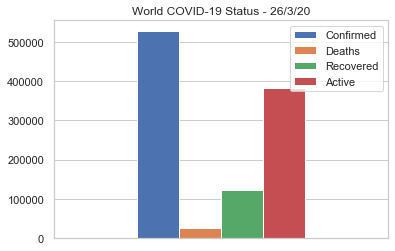

In [293]:
updated_world_status.plot(kind='bar')
x_axis = plt.axes().axes.get_xaxis()
x_axis.set_visible(False)
plt.xticks([], [])
plt.title('World COVID-19 Status - 26/3/20')







In [221]:
updated_world_status.style.highlight_max(color='orange')

,Confirmed,Deaths,Recovered,Active
ObservationDate,,,,
03/26/2020,529591,23970,122150,383471


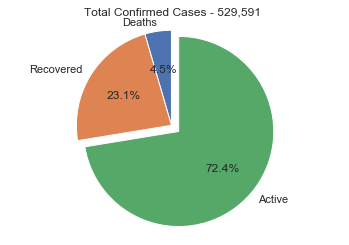

In [295]:
#pie plot
labels = ['Deaths', 'Recovered', 'Active']
sizes = [23907, 122150, 383471]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=(0, 0, 0.1), labels=labels, autopct='%1.1f%%',
         shadow=False, startangle=90)
ax1.axis('equal')
plt.title('Total Confirmed Cases - 529,591 ')
plt.show()